In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Load the Tips dataset

In [2]:
data = sns.load_dataset('tips')
X = data[['total_bill','sex', 'smoker', 'day', 'time', 'size']]
y = data['tip']

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Step 2 : Train and Test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(195, 6)
(49, 6)
(195,)
(49,)


## Step 3 : Perform feature Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
X_train['time'] = le3.fit_transform(X_train['time'])


X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])
X_test['time'] = le3.transform(X_test['time'])

ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],
                                    remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

## Step 4 : Scaled the testing and training data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Use fit_transform only on training
X_test_scaled = scaler.transform(X_test)

## Step 5 : Load the K-Nearest Neighbor Model

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)

## Step 6 : Performance Metrics

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print(mae)
print(mse)
print(rmse)
print(score)

0.8235102040816326
1.6156831020408162
1.2710952372032618
0.32688680653382496


## Step 7 : Testing which value of 'K' is suited for our data

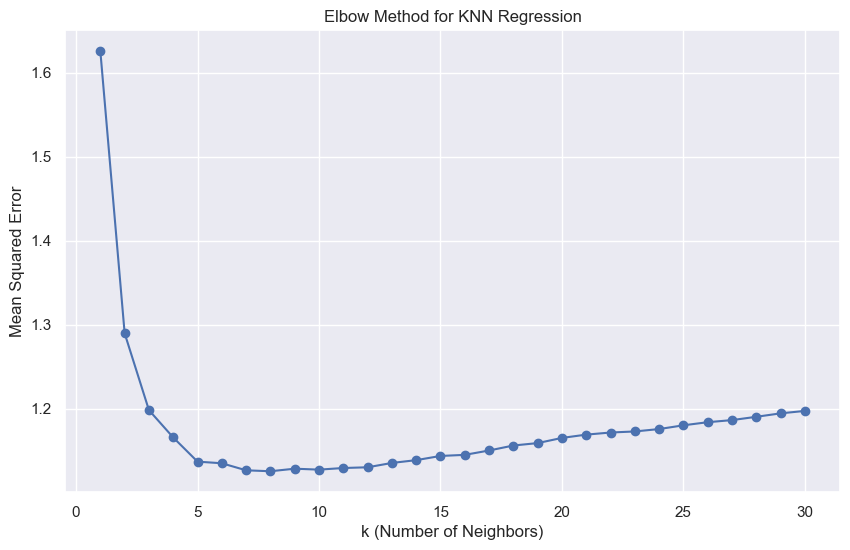

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Elbow method
mse_list = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mse_list.append(mse)

# Plot
plt.figure(figsize=(10,6))
plt.plot(k_values, mse_list, marker='o')
plt.title('Elbow Method for KNN Regression')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
